In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional, LSTM, GRU

In [2]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10), return_sequences=True))
model.add(SimpleRNN(3, input_shape=(2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 2, 3)              42        
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 3)                 21        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 양방향
model = Sequential()
model.add(Bidirectional(SimpleRNN(3, return_sequences=True),input_shape=(2,10)))
model.add(Bidirectional(SimpleRNN(3)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 2, 6)             84        
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 6)                60        
 nal)                                                            
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from IPython.display import Image
Image(filename='bid')

In [6]:
medel = Sequential()
model.add(GRU(3, input_shape=(2,10)))
model.summary()

ValueError: Input 0 of layer "gru_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 6)

In [7]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
(x_train, y_train),(x_test, y_test) = reuters.load_data(test_split=0.2)

In [9]:
print(x_test.shape)

(2246,)


In [10]:
print(x_train.shape)

(8982,)


In [11]:
len(x_train[0])

87

In [12]:
max([len(i) for i in x_train])

2376

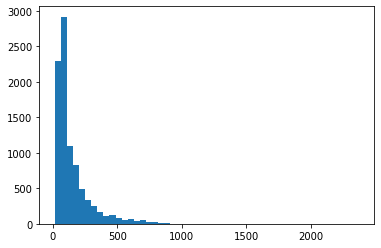

In [13]:
plt.hist([len(i) for i in x_train], bins=50)
plt.show()

In [14]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [15]:
pd.Series(y_train).value_counts()

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
12      49
36      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
37      19
38      19
29      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
dtype: int64

In [16]:
reuters.get_word_index()                # 몇번토크에 몇번인덱스가 무슨마리야....그냥 토큰인덱스인거 같은데

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [17]:
word_to_index = reuters.get_word_index()

In [18]:
index_to_word = {}
for word, idx in word_to_index.items():            #  items => key value로 분리
    index_to_word[idx] = word
    
index_to_word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [19]:
for index, token in enumerate(('<pad>','<sos>','<unk>')):       # pad:padding, unkown:바꿀수없는 토큰표현, sos:시작
    index_to_word[index] = token

In [20]:
[index_to_word[idx] for idx in x_train[0]]   # 인덱스가 단어로 바뀌어서 리스트에 담김

['<sos>',
 'wattie',
 'nondiscriminatory',
 'mln',
 'loss',
 'for',
 'plc',
 'said',
 'at',
 'only',
 'ended',
 'said',
 'commonwealth',
 'could',
 '1',
 'traders',
 'now',
 'april',
 '0',
 'a',
 'after',
 'said',
 'from',
 '1985',
 'and',
 'from',
 'foreign',
 '000',
 'april',
 '0',
 'prices',
 'its',
 'account',
 'year',
 'a',
 'but',
 'in',
 'this',
 'mln',
 'home',
 'an',
 'states',
 'earlier',
 'and',
 'rise',
 'and',
 'revs',
 'vs',
 '000',
 'its',
 '16',
 'vs',
 '000',
 'a',
 'but',
 '3',
 'psbr',
 'oils',
 'several',
 'and',
 'shareholders',
 'and',
 'dividend',
 'vs',
 '000',
 'its',
 'all',
 '4',
 'vs',
 '000',
 '1',
 'mln',
 'agreed',
 'largely',
 'april',
 '0',
 'are',
 '2',
 'states',
 'will',
 'billion',
 'total',
 'and',
 'against',
 '000',
 'pct',
 'dlrs']

In [ ]:
# # <pad> 토큰은 풀네임으로 padding이고, 길이를 맞출때 사용하는 비어있는(사용x) 토큰을 뜻합니다. 
# 각 문장의 길이가 다르니 상대적으로 짧은 문장에 얘를 넣어 길이를 맞춰주는거죠.
# # <sos> 토큰은 풀네임으로 start of sentence이고, 문장의 시작을 알리는 토큰을 뜻합니다. 
# 모든 문장은 <sos> 토큰으로 시작하게 됩니다.
# # <unk> 토큰은 풀네임으로 unknown이고, 모델이 인식할 수 없는 토큰을 뜻합니다. 
# 앞서 데이터를 가져올 때 vocab_size를 지정했었죠? 원래 번호가 6400 이상인 숫자는 모델이 인식하지 못하고 
# 해당 토큰으로 바꿔 인식하게 됩니다.

# 아니 아까도 코로나 얘기할때 삔토 나가가지고 뭐래 했음 코로나 안걸리겠다고 한달넘게 아무도 안만나고 비대면 하는 난 뭐가됨...물론 누군가들에게는 코로나가 가볍다고 생각하지만 난 다른 의견인건데 그냥 다 잡아서 기분나쁨

In [21]:
' '.join([index_to_word[idx] for idx in x_train[0]])

'<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [22]:
x_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [32]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [78]:
(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)  # 많이 사용하는 천개 단어정도만 사용

In [79]:
max_len = 100
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)             # 길이 맞춰주기

In [80]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [81]:
x_train.shape

(8982, 100)

In [58]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(100, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [60]:
es = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [62]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=50, callbacks=[es, mc], validation_data=(x_test,y_test))

Epoch 1/50
68/71 [===========================>..] - ETA: 0s - loss: 2.5973 - acc: 0.3560
Epoch 1: val_acc improved from -inf to 0.45013, saving model to best_model.h5
71/71 [==============================] - 3s 21ms/step - loss: 2.5866 - acc: 0.3583 - val_loss: 2.1828 - val_acc: 0.4501
Epoch 2/50
70/71 [============================>.] - ETA: 0s - loss: 2.0281 - acc: 0.4805
Epoch 2: val_acc improved from 0.45013 to 0.52093, saving model to best_model.h5
71/71 [==============================] - 1s 13ms/step - loss: 2.0286 - acc: 0.4805 - val_loss: 1.8881 - val_acc: 0.5209
Epoch 3/50
70/71 [============================>.] - ETA: 0s - loss: 1.8162 - acc: 0.5315
Epoch 3: val_acc improved from 0.52093 to 0.53963, saving model to best_model.h5
71/71 [==============================] - 1s 13ms/step - loss: 1.8166 - acc: 0.5313 - val_loss: 1.7667 - val_acc: 0.5396
Epoch 4/50
68/71 [===========================>..] - ETA: 0s - loss: 1.7086 - acc: 0.5579
Epoch 4: val_acc improved from 0.53963 to 0.

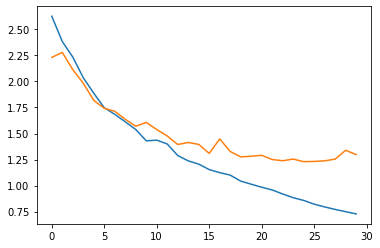

In [51]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

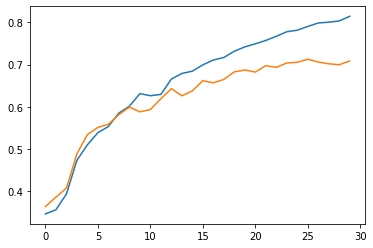

In [52]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

In [54]:
load_model = load_model('best_model.h5')

TypeError: Inputs to a layer should be tensors. Got: best_model.h5

In [46]:
load_model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 8ms/step - loss: 1.1799 - acc: 0.7155


[1.1798863410949707, 0.7154942154884338]

In [55]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 9ms/step - loss: 1.2977 - acc: 0.7084


[1.2977114915847778, 0.7083704471588135]

In [82]:
from tensorflow.keras.datasets import imdb

In [97]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=5000)

In [86]:
# (x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=10000)

In [95]:
x_train.shape

(25000,)

In [96]:
x_test.shape

(25000,)

In [67]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [68]:
y_train       # 긍부정 binary  =>  multi : [(1,0),(0,1)...]

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [102]:
max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)    # 한문장당 길이가 500 되도록
x_test = pad_sequences(x_test, maxlen=max_len)  

In [103]:
model = Sequential()
model.add(Embedding(5000, 120))   # 딥러닝 토큰하나씩 벡터라이징
model.add(LSTM(120))
# model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [104]:
es = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [106]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=50, callbacks=[es, mc], validation_data=(x_test,y_test))

Epoch 1/50
194/196 [============================>.] - ETA: 0s - loss: 0.4716 - acc: 0.7743
Epoch 1: val_acc improved from -inf to 0.83612, saving model to best_model.h5
196/196 [==============================] - 10s 43ms/step - loss: 0.4707 - acc: 0.7748 - val_loss: 0.3757 - val_acc: 0.8361
Epoch 2/50
195/196 [============================>.] - ETA: 0s - loss: 0.3214 - acc: 0.8710
Epoch 2: val_acc improved from 0.83612 to 0.87448, saving model to best_model.h5
196/196 [==============================] - 8s 41ms/step - loss: 0.3212 - acc: 0.8711 - val_loss: 0.3121 - val_acc: 0.8745
Epoch 3/50
195/196 [============================>.] - ETA: 0s - loss: 0.2435 - acc: 0.9061
Epoch 3: val_acc did not improve from 0.87448
196/196 [==============================] - 8s 41ms/step - loss: 0.2437 - acc: 0.9060 - val_loss: 0.3201 - val_acc: 0.8689
Epoch 4/50
195/196 [============================>.] - ETA: 0s - loss: 0.1987 - acc: 0.9234
Epoch 4: val_acc did not improve from 0.87448
196/196 [=========

In [107]:
load_model = load_model('best_model.h5')

TypeError: Inputs to a layer should be tensors. Got: best_model.h5

In [108]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.3839 - acc: 0.8643


[0.3838796615600586, 0.8643199801445007]